# Install packages

In [2]:
# !pip install pandas
# !pip install numpy
# !pip install nltk
# !pip install gensim
# !pip install pyLDAvis
# !pip install langdetect
# !pip install wordcloud

# Load packages

In [3]:
#load all required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import nltk.corpus
import nltk.sentiment
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from langdetect import detect

# nltk.download('omw-1.4')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')
# nltk.download('vader_lexicon')

import os

import re
import string
from string import punctuation

# import gensim
# from gensim import corpora

# import pyLDAvis
# import pyLDAvis.gensim

# Load Data

In [4]:
#load the dataset
url='C:\\Users\\Guilherme\\Desktop\\FEP DATA ANALYTICS\\DM2\\gw2\\Airbnb data Boston\\reviews.csv'
df=pd.read_csv(url)
# df

# PreProcessing

In [5]:
# drop unused columns
df=df.drop(['id','date', 'reviewer_id','reviewer_name'], axis=1)
df.head()

,listing_id,comments
0,3781,The apartment was as advertised and Frank was ...
1,3781,It was a pleasure to stay at Frank's place. Th...
2,3781,The apartment description is entirely faithful...
3,3781,Thoroughly enjoyed my time at Frank's home. Ha...
4,3781,Great value for the money! This location has e...


In [6]:
#Removing null rows
df = df.dropna()

#Removing rows with few words
df=df.drop(df[df['comments'].apply(len)<30].index,axis=0)

In [7]:
#Adding new column with the language of the review, using langdetect package
df['Language'] = df['comments'].apply(lambda x: detect(x))

# Considering only reviews in english
df= df[df['Language'] == 'en'] 

#Tokenize

df['Token'] = df['comments'].apply(lambda x: word_tokenize(x.lower()))
df.head()

,listing_id,comments,Language,Token
0,3781,The apartment was as advertised and Frank was ...,en,"[the, apartment, was, as, advertised, and, fra..."
1,3781,It was a pleasure to stay at Frank's place. Th...,en,"[it, was, a, pleasure, to, stay, at, frank, 's..."
2,3781,The apartment description is entirely faithful...,en,"[the, apartment, description, is, entirely, fa..."
3,3781,Thoroughly enjoyed my time at Frank's home. Ha...,en,"[thoroughly, enjoyed, my, time, at, frank, 's,..."
4,3781,Great value for the money! This location has e...,en,"[great, value, for, the, money, !, this, locat..."


In [8]:
stopwords = stopwords.words('english')
punctuation = list(punctuation)
words = set(nltk.corpus.words.words())   
df['Token'] = df['Token'].apply(lambda x: [t for t in x if t not in stopwords and t not in punctuation and t in words])
df.head()

,listing_id,comments,Language,Token
0,3781,The apartment was as advertised and Frank was ...,en,"[apartment, frank, incredibly, helpful, entire..."
1,3781,It was a pleasure to stay at Frank's place. Th...,en,"[pleasure, stay, frank, place, place, everythi..."
2,3781,The apartment description is entirely faithful...,en,"[apartment, description, entirely, faithful, b..."
3,3781,Thoroughly enjoyed my time at Frank's home. Ha...,en,"[thoroughly, time, frank, home, clean, accommo..."
4,3781,Great value for the money! This location has e...,en,"[great, value, money, location, exceeding, jus..."


In [9]:
df['freqdist'] = df['Token'].apply(lambda x: FreqDist(x))
df.head()

,listing_id,comments,Language,Token,freqdist
0,3781,The apartment was as advertised and Frank was ...,en,"[apartment, frank, incredibly, helpful, entire...","{'apartment': 1, 'frank': 1, 'incredibly': 1, ..."
1,3781,It was a pleasure to stay at Frank's place. Th...,en,"[pleasure, stay, frank, place, place, everythi...","{'pleasure': 1, 'stay': 2, 'frank': 2, 'place'..."
2,3781,The apartment description is entirely faithful...,en,"[apartment, description, entirely, faithful, b...","{'apartment': 1, 'description': 1, 'entirely':..."
3,3781,Thoroughly enjoyed my time at Frank's home. Ha...,en,"[thoroughly, time, frank, home, clean, accommo...","{'thoroughly': 1, 'time': 1, 'frank': 1, 'home..."
4,3781,Great value for the money! This location has e...,en,"[great, value, money, location, exceeding, jus...","{'great': 1, 'value': 1, 'money': 1, 'location..."


In [10]:
# from sklearn.feature_extraction.text import CountVectorizer

# # convert list of tokens to strings
# df['Token_str'] = df['Token'].apply(lambda x: ' '.join(x))

# # create bag of words
# vectorizer = CountVectorizer(lowercase=False, max_features=10)
# bag_of_words = vectorizer.fit_transform(df['Token_str'])

In [11]:
# from scipy.sparse import csr_matrix
# import pandas as pd

# bag_of_words_sparse = csr_matrix(bag_of_words)
# bag_of_words_df = pd.DataFrame.sparse.from_spmatrix(bag_of_words_sparse, columns=vectorizer.get_feature_names())
# bag_of_words_df

In [12]:
# # create a function that applies the stemming task

# from nltk.stem import PorterStemmer
# stemmer = PorterStemmer()
# def stem_words(text):
#     return " ".join([stemmer.stem(word) for word in text])
# df["Token"] = df["Token"].apply(lambda x: stem_words(x))

In [13]:
# #create a function that applies the lemmatizer task
# from nltk.stem import WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()
# def lemmatize_words(text):
#     return " ".join([lemmatizer.lemmatize(word) for word in text])
# df.iloc["Token"] = df["Token"].apply(lambda text: lemmatize_words(text))

# Sentiment analysis

In [14]:
analyzer = nltk.sentiment.vader.SentimentIntensityAnalyzer()

# Creating 4 new columns with the sentiment analysis result

df['neg'] = df['comments'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
df['neu'] = df['comments'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
df['pos'] = df['comments'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
df['compound'] = df['comments'].apply(lambda x:analyzer.polarity_scores(x)['compound'])

# df

In [15]:
# Define the number of bins
n_bins = 5

# Use the qcut function to discretize the compound column
df['sentiment_class'] = pd.qcut(df['compound'], q=n_bins, labels=False)

# Map the class labels to the corresponding bin labels
bin_labels = ['1', '2', '3', '4', '5']
df['sentiment_class'] = df['sentiment_class'].map(lambda x: bin_labels[x])

# Print the distribution of the new column
print(df['sentiment_class'].value_counts())

1    29175
4    29123
2    29105
5    28856
3    28701
Name: sentiment_class, dtype: int64


In [16]:
max(df['compound'])

0.9995

In [17]:
df['compound'].std()

0.25368659309611896

In [18]:
min(df['compound'])

-0.9984

# Listings data

In [19]:
#load the dataset

url_listing='C:\\Users\\Guilherme\\Desktop\\FEP DATA ANALYTICS\\DM2\\gw2\\Airbnb data Boston\\listings (3).csv'
df_listing=pd.read_csv(url_listing)

# drop unused columns

df_listing=df_listing.drop(['host_id','neighbourhood_group',
                            'latitude','longitude','reviews_per_month',
                            'calculated_host_listings_count',
                            'number_of_reviews_ltm','license'], axis=1)

df_listing.rename(columns = {'id':'listing_id'}, inplace = True)

# merge the two DataFrames on the "listing_id" column
merged_df = pd.merge(df_listing, df, on='listing_id')

# # group the merged DataFrame by "listing_id" and calculate the mean of the "Sentiment" column for each group
sentiment_means = merged_df.groupby('listing_id')['compound'].mean().reset_index()

# merge the sentiment_means DataFrame with the df_listings DataFrame on the "listing_id" column
df_listing = pd.merge(df_listing, sentiment_means, on='listing_id')

# Use the qcut function to discretize the compound column
df_listing['sentiment_class'] = pd.qcut(df_listing['compound'], q=n_bins, labels=False)

# Map the class labels to the corresponding bin labels
df_listing['sentiment_class'] = df_listing['sentiment_class'].map(lambda x: bin_labels[x])

#Creating price_class to the analysis

# Use the qcut function to discretize the price column
df_listing['price_class'] = pd.qcut(df_listing['price'], q=n_bins, labels=False)

# Map the class labels to the corresponding bin labels
df_listing['price_class'] = df_listing['price_class'].map(lambda x: bin_labels[x])


# df_listing.sort_values(by=['compound'],ascending=False).head()

In [20]:
# Print the distribution of the new column
# print(df_listing['price_class'].value_counts())

In [21]:
url_listing='C:\\Users\\Guilherme\\Desktop\\FEP DATA ANALYTICS\\DM2\\gw2\\Airbnb data Boston\\listings.csv'
df_listing_full=pd.read_csv(url_listing)
df_listing_full.rename(columns = {'id':'listing_id'}, inplace = True)

df_listing_reviews=df_listing_full[['listing_id','host_is_superhost','review_scores_rating',
                                   'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin',
                                   'review_scores_communication', 'review_scores_location','review_scores_value']]

df_listing = pd.merge(df_listing, df_listing_reviews, on='listing_id')
# df_listing_full.columns

# Creating DataFrames for the analysis

In [22]:
# create a new DataFrame with the unique values for the "room_type" column
df_room_type = pd.DataFrame(df_listing['room_type'].unique(), columns=['room_type'])

#calculate the mean of the "review_scores_rating"
room_type_review_scores_rating_means = df_listing.groupby('room_type')['review_scores_rating'].mean().reset_index()
#calculate the mean of the "review_scores_cleanliness"
room_type_review_scores_cleanliness_means = df_listing.groupby('room_type')['review_scores_cleanliness'].mean().reset_index()
#calculate the mean of the "review_scores_location"
room_type_review_scores_location_means = df_listing.groupby('room_type')['review_scores_location'].mean().reset_index()
#calculate the mean of the "review_scores_value"
room_type_review_scores_value_means = df_listing.groupby('room_type')['review_scores_value'].mean().reset_index()
# calculate superhost percentage by room type
room_type_superhost_pct = df_listing.groupby(['room_type'])['host_is_superhost'].apply(lambda x: (x == 't').sum() / len(x) * 100).reset_index()
room_type_superhost_pct.rename(columns={'host_is_superhost': 'superhost_percentage'}, inplace=True)
# calculate "compound" mean by room type
room_type_sentiment_means = df_listing.groupby('room_type')['compound'].mean().reset_index()

# calculate the "number_of_listings" column for each unique room_type
room_type_number_of_listings = df_listing.groupby('room_type')['listing_id'].count().reset_index()

# calculate the mean of the "number_of_reviews" column for each unique neighbourhood
room_type_number_of_reviews_means = df_listing.groupby('room_type')['number_of_reviews'].mean().reset_index()
#calculate the mode of the "Sentiment_class"
room_type_sentiment_mode=df_listing.groupby('room_type')['sentiment_class'].agg(pd.Series.mode)
#calculate the median of the "Sentiment_class"
room_type_sentiment_median=df_listing.groupby('room_type')['sentiment_class'].agg(pd.Series.median)
# calculate the mean of  the "price_class"
room_type_price_means = df_listing.groupby('room_type')['price'].mean().reset_index()
#calculate the mode of the "price_class"
room_type_price_class_mode=df_listing.groupby('room_type')['price_class'].agg(pd.Series.mode)
#calculate the median of the "price_class"
room_type_price_class_median=df_listing.groupby('room_type')['price_class'].agg(pd.Series.median) 

# merge all DataFrames on the "room_type" column 
df_room_type = pd.merge(df_room_type, room_type_review_scores_rating_means, on='room_type')
df_room_type = pd.merge(df_room_type, room_type_review_scores_cleanliness_means, on='room_type')
df_room_type = pd.merge(df_room_type, room_type_review_scores_location_means, on='room_type')
df_room_type = pd.merge(df_room_type, room_type_review_scores_value_means, on='room_type')
df_room_type = pd.merge(df_room_type, room_type_superhost_pct, on='room_type')
df_room_type = pd.merge(df_room_type, room_type_number_of_reviews_means, on='room_type')
df_room_type = pd.merge(df_room_type, room_type_sentiment_means, on='room_type')
df_room_type = pd.merge(df_room_type, room_type_sentiment_mode, on='room_type')
df_room_type = pd.merge(df_room_type, room_type_sentiment_median, on='room_type')
df_room_type = pd.merge(df_room_type, room_type_price_means, on='room_type')
df_room_type = pd.merge(df_room_type, room_type_price_class_mode, on='room_type')
df_room_type = pd.merge(df_room_type, room_type_price_class_median, on='room_type')

#Order by compound DESC
df_room_type.sort_values(by=['compound'],ascending=False,inplace=True)
# display the result
df_room_type

# df_room_type.to_csv('C:\\Users\\Guilherme\\Desktop\\FEP DATA ANALYTICS\\DM2\gw2\\Tabelas\\Room_type_1.csv',sep=';',decimal=',')

,room_type,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value,superhost_percentage,number_of_reviews,compound,sentiment_class_x,sentiment_class_y,price,price_class_x,price_class_y
0,Entire home/apt,4.699054,4.755435,4.812370,4.593516,33.051802,61.221847,0.787504,4,3.0,230.009572,5,4.0
1,Private room,4.663892,4.657834,4.648961,4.627390,35.476464,59.570608,0.782171,1,3.0,104.435132,1,1.0
3,Hotel room,4.641765,4.793529,4.908235,4.585882,41.176471,96.764706,0.749773,2,2.0,390.058824,5,5.0
2,Shared room,4.633333,4.497500,4.635000,4.675833,16.666667,48.583333,0.658873,1,2.0,62.083333,1,1.0


In [23]:
# create a new DataFrame with the unique values for the "neighbourhood" column
df_neighbourhood = pd.DataFrame(df_listing['neighbourhood'].unique(), columns=['neighbourhood'])

#calculate the mean of the "review_scores_rating"
neighbourhood_review_scores_rating_means = df_listing.groupby('neighbourhood')['review_scores_rating'].mean().reset_index()
#calculate the mean of the "review_scores_cleanliness"
neighbourhood_review_scores_cleanliness_means = df_listing.groupby('neighbourhood')['review_scores_cleanliness'].mean().reset_index()
#calculate the mean of the "review_scores_location"
neighbourhood_review_scores_location_means = df_listing.groupby('neighbourhood')['review_scores_location'].mean().reset_index()
#calculate the mean of the "review_scores_value"
neighbourhood_review_scores_value_means = df_listing.groupby('neighbourhood')['review_scores_value'].mean().reset_index()
# calculate superhost percentage by room type
neighbourhood_superhost_pct = df_listing.groupby(['neighbourhood'])['host_is_superhost'].apply(lambda x: (x == 't').sum() / len(x) * 100).reset_index()
neighbourhood_superhost_pct.rename(columns={'host_is_superhost': 'superhost_percentage'}, inplace=True)
# calculate the sum of the "number_of_reviews" column for each unique neighbourhood
neighbourhood_number_of_reviews = df_listing.groupby('neighbourhood')['number_of_reviews'].sum().reset_index()
# calculate the "number_of_listings" column for each unique neighbourhood
neighbourhood_number_of_listings = df_listing.groupby('neighbourhood')['listing_id'].count().reset_index()

# calculate the mean of the "Sentiment" column for each unique neighbourhood
neighbourhood_sentiment_means = df_listing.groupby('neighbourhood')['compound'].mean().reset_index()

#calculate the mode of the "Sentiment_class"
neighbourhood_type_sentiment_mode=df_listing.groupby('neighbourhood')['sentiment_class'].agg(pd.Series.mode)
#calculate the median of the "Sentiment_class"
neighbourhood_type_sentiment_median=df_listing.groupby('neighbourhood')['sentiment_class'].agg(pd.Series.median)

# calculate the mean of  the "price"
neighbourhood_price_means = df_listing.groupby('neighbourhood')['price'].mean().reset_index()

#calculate the mode of the "price_class"
neighbourhood_type_price_class_mode=df_listing.groupby('neighbourhood')['price_class'].agg(pd.Series.mode)

#calculate the median of the "price_class"
neighbourhood_type_price_class_median=df_listing.groupby('neighbourhood')['price_class'].agg(pd.Series.median)

#calculate the mode of the "room_type"
neighbourhood_room_type_mode=df_listing.groupby('neighbourhood')['room_type'].agg(pd.Series.mode)

# merge all DataFrames on the "room_type" column
df_neighbourhood = pd.merge(df_neighbourhood, neighbourhood_review_scores_rating_means, on='neighbourhood')
df_neighbourhood = pd.merge(df_neighbourhood, neighbourhood_review_scores_cleanliness_means, on='neighbourhood')
df_neighbourhood = pd.merge(df_neighbourhood, neighbourhood_review_scores_location_means, on='neighbourhood')
df_neighbourhood = pd.merge(df_neighbourhood, neighbourhood_review_scores_value_means, on='neighbourhood')
df_neighbourhood = pd.merge(df_neighbourhood, neighbourhood_superhost_pct, on='neighbourhood')
df_neighbourhood = pd.merge(df_neighbourhood, neighbourhood_number_of_reviews, on='neighbourhood')
df_neighbourhood = pd.merge(df_neighbourhood, neighbourhood_number_of_listings, on='neighbourhood')
df_neighbourhood = pd.merge(df_neighbourhood, neighbourhood_sentiment_means, on='neighbourhood')
df_neighbourhood = pd.merge(df_neighbourhood, neighbourhood_type_sentiment_mode, on='neighbourhood')
df_neighbourhood = pd.merge(df_neighbourhood, neighbourhood_type_sentiment_median, on='neighbourhood')
df_neighbourhood = pd.merge(df_neighbourhood, neighbourhood_price_means, on='neighbourhood')
df_neighbourhood = pd.merge(df_neighbourhood, neighbourhood_type_price_class_mode, on='neighbourhood')
df_neighbourhood = pd.merge(df_neighbourhood, neighbourhood_type_price_class_median, on='neighbourhood')
df_neighbourhood = pd.merge(df_neighbourhood, neighbourhood_room_type_mode, on='neighbourhood')

#Order by compound DESC
df_neighbourhood.sort_values(by=['compound'],ascending=False,inplace=True)

df_neighbourhood.to_csv('C:\\Users\\Guilherme\\Desktop\\FEP DATA ANALYTICS\\DM2\gw2\\Tabelas\\neighbourhood_2.csv',sep=';',decimal=',')

# display the result
df_neighbourhood.head()

,neighbourhood,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value,superhost_percentage,number_of_reviews,listing_id,compound,sentiment_class_x,sentiment_class_y,price,price_class_x,price_class_y,room_type
24,Longwood Medical Area,4.950000,4.936667,4.950000,4.923333,0.000000,41,3,0.913859,5,5.0,127.666667,"[1, 2, 4]",2.0,Private room
23,Leather District,4.930000,4.930000,5.000000,5.000000,0.000000,8,2,0.907264,"[4, 5]",4.5,168.000000,"[3, 4]",3.5,"[Entire home/apt, Private room]"
17,Charlestown,4.835574,4.874754,4.805246,4.730984,67.213115,4255,61,0.857746,3,3.0,243.229508,5,4.0,Entire home/apt
6,Jamaica Plain,4.799298,4.830882,4.843765,4.733471,43.859649,12493,171,0.845952,5,4.0,181.228070,3,3.0,Entire home/apt
14,Roslindale,4.825424,4.787966,4.740847,4.776949,54.237288,2054,59,0.838952,4,4.0,140.254237,1,2.0,Entire home/apt


In [24]:
# create a new DataFrame with the unique values for the "neighbourhood" column
df_price_class = pd.DataFrame(df_listing['price_class'].unique(), columns=['price_class'])

#calculate the mean of the "review_scores_rating"
price_class_review_scores_rating_means = df_listing.groupby('price_class')['review_scores_rating'].mean().reset_index()
#calculate the mean of the "review_scores_cleanliness"
price_class_review_scores_cleanliness_means = df_listing.groupby('price_class')['review_scores_cleanliness'].mean().reset_index()
#calculate the mean of the "review_scores_location"
price_class_review_scores_location_means = df_listing.groupby('price_class')['review_scores_location'].mean().reset_index()
#calculate the mean of the "review_scores_value"
price_class_review_scores_value_means = df_listing.groupby('price_class')['review_scores_value'].mean().reset_index()
# calculate superhost percentage by room type
price_class_superhost_pct = df_listing.groupby(['price_class'])['host_is_superhost'].apply(lambda x: (x == 't').sum() / len(x) * 100).reset_index()
price_class_superhost_pct.rename(columns={'host_is_superhost': 'superhost_percentage'}, inplace=True)
# calculate the sum of the "number_of_reviews" column for each unique neighbourhood
price_class_number_of_reviews = df_listing.groupby('price_class')['number_of_reviews'].sum().reset_index()
# calculate the "number_of_listings" column for each unique neighbourhood
price_class_number_of_listings = df_listing.groupby('price_class')['listing_id'].count().reset_index()

# calculate the mean of the "Sentiment" column for each unique neighbourhood
price_class_sentiment_means = df_listing.groupby('price_class')['compound'].mean().reset_index()

#calculate the mode of the "Sentiment_class"
price_class_type_sentiment_mode=df_listing.groupby('price_class')['sentiment_class'].agg(pd.Series.mode)
#calculate the median of the "Sentiment_class"
price_class_type_sentiment_median=df_listing.groupby('price_class')['sentiment_class'].agg(pd.Series.median)

# calculate the mean of  the "price"
price_class_price_means = df_listing.groupby('price_class')['price'].mean().reset_index()

#calculate the mode of the "room_type"
price_class_room_type_mode=df_listing.groupby('price_class')['room_type'].agg(pd.Series.mode)

# merge all DataFrames on the "room_type" column
df_price_class = pd.merge(df_price_class, price_class_review_scores_rating_means, on='price_class')
df_price_class = pd.merge(df_price_class, price_class_review_scores_cleanliness_means, on='price_class')
df_price_class = pd.merge(df_price_class, price_class_review_scores_location_means, on='price_class')
df_price_class = pd.merge(df_price_class, price_class_review_scores_value_means, on='price_class')
df_price_class = pd.merge(df_price_class, price_class_superhost_pct, on='price_class')
df_price_class = pd.merge(df_price_class, price_class_number_of_reviews, on='price_class')
df_price_class = pd.merge(df_price_class, price_class_number_of_listings, on='price_class')
df_price_class = pd.merge(df_price_class, price_class_sentiment_means, on='price_class')
df_price_class = pd.merge(df_price_class, price_class_type_sentiment_mode, on='price_class')
df_price_class = pd.merge(df_price_class, price_class_type_sentiment_median, on='price_class')
df_price_class = pd.merge(df_price_class, price_class_price_means, on='price_class')
df_price_class = pd.merge(df_price_class, price_class_room_type_mode, on='price_class')

#Order by compound DESC
df_price_class.sort_values(by=['compound'],ascending=False,inplace=True)

# df_price_class.to_csv('C:\\Users\\Guilherme\\Desktop\\FEP DATA ANALYTICS\\DM2\gw2\\Tabelas\\price_class.csv',sep=';',decimal=',')

# display the result
df_price_class.head()

,price_class,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value,superhost_percentage,number_of_reviews,listing_id,compound,sentiment_class_x,sentiment_class_y,price,room_type
3,5,4.755225,4.796348,4.840730,4.625187,40.823970,29453,534,0.807073,5,3.0,442.891386,Entire home/apt
1,4,4.712996,4.779485,4.804207,4.597610,33.015267,29524,524,0.792017,4,3.0,206.125954,Entire home/apt
0,3,4.687367,4.747685,4.810854,4.596679,37.121212,36956,528,0.781295,2,3.0,144.946970,Entire home/apt
4,2,4.630483,4.674371,4.751614,4.581801,31.040892,40441,538,0.773818,1,3.0,101.094796,Entire home/apt
2,1,4.650815,4.620544,4.594727,4.622091,27.355072,26470,552,0.771192,1,3.0,56.885870,Private room


In [25]:
# create a new DataFrame with the unique values for the "neighbourhood" column
df_sentiment_class = pd.DataFrame(df_listing['sentiment_class'].unique(), columns=['sentiment_class'])

#calculate the mean of the "review_scores_rating"
sentiment_class_review_scores_rating_means = df_listing.groupby('sentiment_class')['review_scores_rating'].mean().reset_index()
#calculate the mean of the "review_scores_cleanliness"
sentiment_class_review_scores_cleanliness_means = df_listing.groupby('sentiment_class')['review_scores_cleanliness'].mean().reset_index()
#calculate the mean of the "review_scores_location"
sentiment_class_review_scores_location_means = df_listing.groupby('sentiment_class')['review_scores_location'].mean().reset_index()
#calculate the mean of the "review_scores_value"
sentiment_class_review_scores_value_means = df_listing.groupby('sentiment_class')['review_scores_value'].mean().reset_index()
# calculate superhost percentage by room type
sentiment_class_superhost_pct = df_listing.groupby(['sentiment_class'])['host_is_superhost'].apply(lambda x: (x == 't').sum() / len(x) * 100).reset_index()
sentiment_class_superhost_pct.rename(columns={'host_is_superhost': 'superhost_percentage'}, inplace=True)
# calculate the sum of the "number_of_reviews" column for each unique neighbourhood
sentiment_class_number_of_reviews = df_listing.groupby('sentiment_class')['number_of_reviews'].sum().reset_index()
# calculate the "number_of_listings" column for each unique neighbourhood
sentiment_class_number_of_listings = df_listing.groupby('sentiment_class')['listing_id'].count().reset_index()

# calculate the mean of the "Sentiment" column for each unique neighbourhood
sentiment_class_sentiment_means = df_listing.groupby('sentiment_class')['compound'].mean().reset_index()

#calculate the mode of the "Sentiment_class"
# price_class_type_sentiment_mode=df_listing.groupby('sentiment_class')['sentiment_class'].agg(pd.Series.mode)
# #calculate the median of the "Sentiment_class"
# price_class_type_sentiment_median=df_listing.groupby('sentiment_class')['sentiment_class'].agg(pd.Series.median)

# calculate the mean of  the "price"
sentiment_class_price_means = df_listing.groupby('sentiment_class')['price'].mean().reset_index()

#calculate the mode of the "room_type"
sentiment_class_room_type_mode=df_listing.groupby('sentiment_class')['room_type'].agg(pd.Series.mode)

# merge all DataFrames on the "room_type" column
df_sentiment_class = pd.merge(df_sentiment_class, sentiment_class_review_scores_rating_means, on='sentiment_class')
df_sentiment_class = pd.merge(df_sentiment_class, sentiment_class_review_scores_cleanliness_means, on='sentiment_class')
df_sentiment_class = pd.merge(df_sentiment_class, sentiment_class_review_scores_location_means, on='sentiment_class')
df_sentiment_class = pd.merge(df_sentiment_class, sentiment_class_review_scores_value_means, on='sentiment_class')
df_sentiment_class = pd.merge(df_sentiment_class, sentiment_class_superhost_pct, on='sentiment_class')
df_sentiment_class = pd.merge(df_sentiment_class, sentiment_class_number_of_reviews, on='sentiment_class')
df_sentiment_class = pd.merge(df_sentiment_class, sentiment_class_number_of_listings, on='sentiment_class')
df_sentiment_class = pd.merge(df_sentiment_class, sentiment_class_sentiment_means, on='sentiment_class')
# df_sentiment_class = pd.merge(df_sentiment_class, sentiment_class_type_sentiment_mode, on='sentiment_class')
# df_sentiment_class = pd.merge(df_sentiment_class, sentiment_class_type_sentiment_median, on='sentiment_class')
df_sentiment_class = pd.merge(df_sentiment_class, sentiment_class_price_means, on='sentiment_class')
df_sentiment_class = pd.merge(df_sentiment_class, sentiment_class_room_type_mode, on='sentiment_class')

#Order by compound DESC
df_sentiment_class.sort_values(by=['compound'],ascending=False,inplace=True)

df_sentiment_class.to_csv('C:\\Users\\Guilherme\\Desktop\\FEP DATA ANALYTICS\\DM2\gw2\\Tabelas\\df_sentiment_class.csv',sep=';',decimal=',')

# display the result
df_sentiment_class.head()

,sentiment_class,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value,superhost_percentage,number_of_reviews,listing_id,compound,price,room_type
2,5,4.884785,4.856991,4.856180,4.773539,38.691589,19784,535,0.930993,198.022430,Entire home/apt
0,4,4.852056,4.820748,4.816953,4.751963,56.448598,43945,535,0.874141,196.564486,Entire home/apt
1,3,4.768991,4.792953,4.777439,4.660430,44.859813,45515,535,0.825627,195.459813,Entire home/apt
3,2,4.678839,4.720918,4.762022,4.599139,21.910112,39347,534,0.767244,175.983146,Entire home/apt
4,1,4.251695,4.419434,4.581210,4.235274,7.262570,14253,537,0.527681,180.979516,Entire home/apt


# Correlation Analysis

<AxesSubplot:>

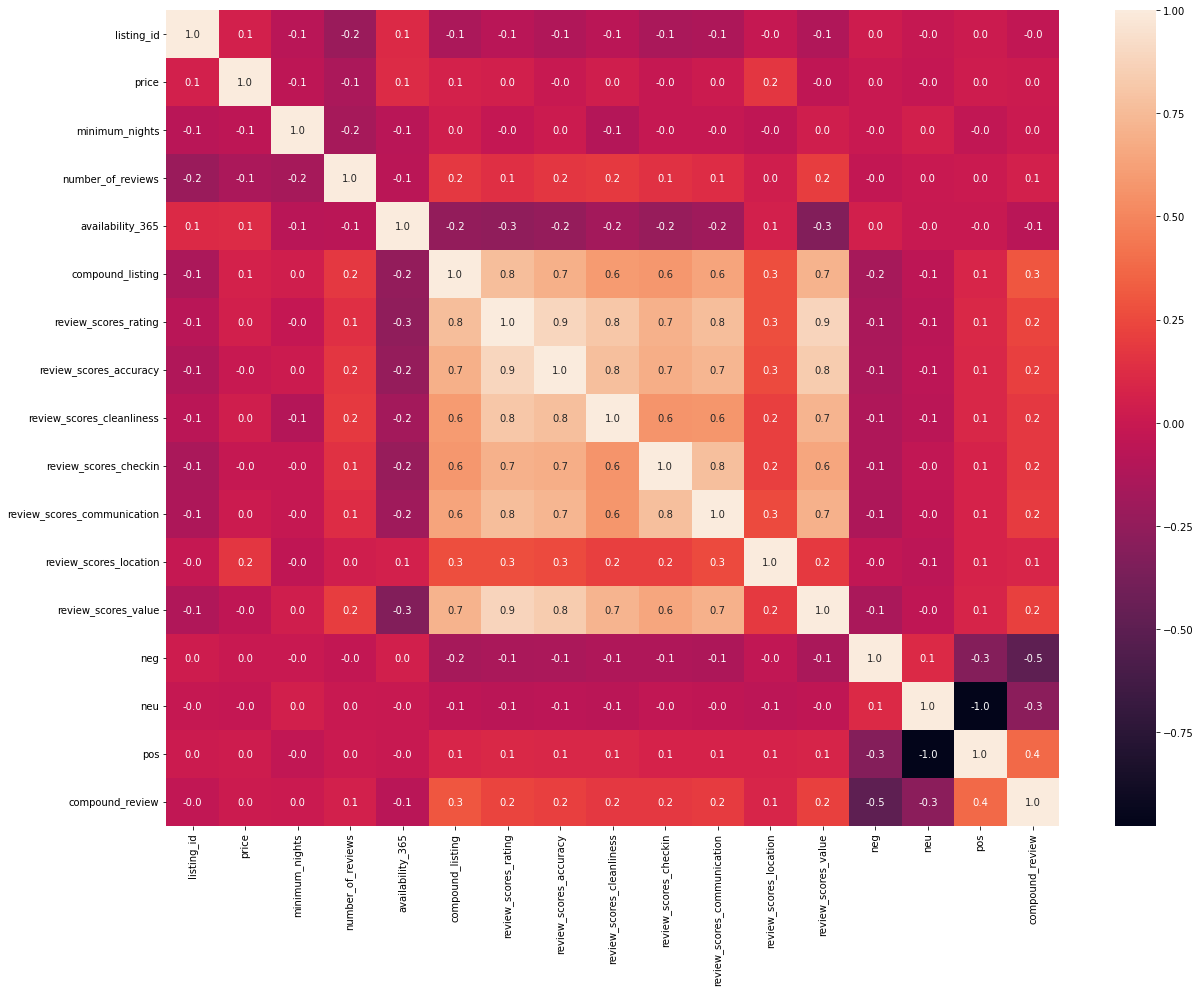

In [26]:
# merge the two DataFrames on the "listing_id" column
df_merged = pd.merge(df_listing, df, on='listing_id')
df_merged[['listing_id','compound_y','compound_x','sentiment_class_x','sentiment_class_y']]
df_merged.rename(columns={'compound_x': 'compound_listing'}, inplace=True)
df_merged.rename(columns={'compound_y': 'compound_review'}, inplace=True)
df_merged.rename(columns={'sentiment_class_x': 'sentiment_class_listing'}, inplace=True)
df_merged.rename(columns={'sentiment_class_y': 'sentiment_class_review'}, inplace=True)


correlation = df_merged.corr()

plt.figure ( figsize = (20,15))
sns.heatmap(correlation,
           annot=True, #Show Values
           fmt=".1f") # 1 decimal

# correlation_sentiment_analysis=correlation[['compound_listing','compound_review']].sort_values(by='compound_review',ascending=False)
# plt.figure ( figsize = (17,15))
# sns.heatmap(correlation_sentiment_analysis,
#            annot=True, #Show Values
#            fmt=".5f" # 5 decimal
#             ).set_xticklabels(ax.get_xticklabels(), rotation=40)


In [27]:

df_merged_1=df_merged.drop(['host_is_superhost', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'], axis=1)
df_merged_full = pd.merge(df_listing_full, df_merged_1, on='listing_id')
# df_merged_full = pd.merge(df_merged_full, df_listing[['listing_id','price_class', 'sentiment_class']], on='listing_id')

# df_merged_full.columns

Text(0.5, 1.0, 'Correlation Heatmap of Sentiment Analysis')

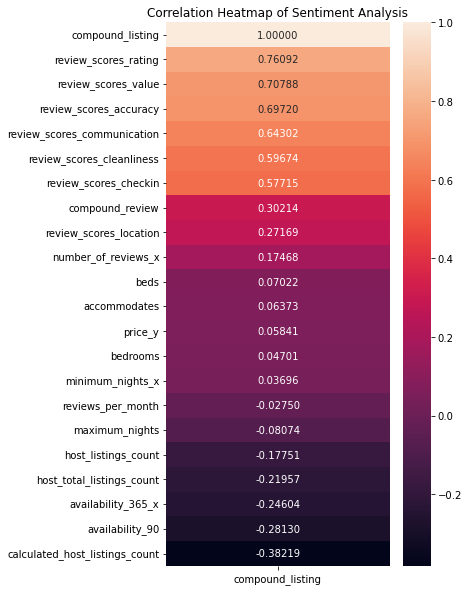

In [28]:
df_corr_full=df_merged_full[['host_response_time', 'host_response_rate',
                             'host_acceptance_rate', 'host_is_superhost',
                             'host_listings_count','host_total_listings_count',
                             'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_x',
                             'neighbourhood_cleansed', 'property_type', 'room_type_x', 'accommodates',
                             'bedrooms', 'beds','price_y', 'minimum_nights_x', 'maximum_nights',
                             'availability_90', 'availability_365_x',
                             'number_of_reviews_x', 'review_scores_rating', 'review_scores_accuracy',
                             'review_scores_cleanliness', 'review_scores_checkin',
                             'review_scores_communication', 'review_scores_location',
                             'review_scores_value','calculated_host_listings_count', 'reviews_per_month',
                             'compound_listing', 'sentiment_class_listing','price_class', 
                             'compound_review', 'sentiment_class_review']]

# df_corr_full.to_csv('C:\\Users\\Guilherme\\Desktop\\FEP DATA ANALYTICS\\DM2\gw2\\Tabelas\\df_corr_full.csv',sep=';',decimal=',')


#Plotting heatmap

correlation = df_corr_full.corr()

# plt.figure ( figsize = (20,15))
# sns.heatmap(correlation,
#            annot=True, #Show Values
#            fmt=".1f") # 1 decimal

correlation_sentiment_analysis=correlation[['compound_listing']].sort_values(by='compound_listing',ascending=False)
plt.figure ( figsize = (5,10))
sns.heatmap(correlation_sentiment_analysis,
           annot=True, #Show Values
           fmt=".5f" # 5 decimal
            ,
            )#.set_xticklabels(ax.get_xticklabels(), rotation=40)

# Add a title
plt.title("Correlation Heatmap of Sentiment Analysis")

# T TEST

In [55]:
import scipy.stats as stats

group1 = df_corr_full.query('price_class=="4"')['review_scores_rating']  # First group of data
group2 = df_corr_full.query('price_class=="3"')['review_scores_rating']  # Second group of data

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(group1, group2)

# Print the t-statistic and p-value
print("T-Statistic: ", t_statistic)
print("P-Value: ", p_value)

T-Statistic:  26.69537459378975
P-Value:  4.4140573504606007e-156


In [56]:
import scipy.stats as stats

group1 = df_corr_full.query('price_class=="4"')['compound_review']  # First group of data
group2 = df_corr_full.query('price_class=="5"')['compound_review']  # Second group of data

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(group1, group2)

# Print the t-statistic and p-value
print("T-Statistic: ", t_statistic)
print("P-Value: ", p_value)

T-Statistic:  -0.7924229677182031
P-Value:  0.428117606616057


# Summarization

The code from here on was not used in the analysis presented in the report

In [368]:
word_frequencies={}
for index, row in df.iterrows():
    for lkey in row['freqdist'].keys():
        if lkey not in word_frequencies:
            word_frequencies[lkey]=row['freqdist'].get(lkey)
        else:
            word_frequencies[lkey]+=row['freqdist'].get(lkey)
word_frequencies

df_word_frequencies = pd.DataFrame(list(word_frequencies.items()), columns=['Words', 'Frequency'])
df_word_frequencies.sort_values(by=['Frequency'],ascending=False,inplace=True)
# df_word_frequencies.head(30)

In [367]:
maximum_frequncy = max(word_frequencies.values())

for word in word_frequencies.keys():
    word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)

df_word_frequencies_1 = pd.DataFrame(list(word_frequencies.items()), columns=['Words', 'Frequency_%'])
df_word_frequencies_1.sort_values(by=['Frequency_%'],ascending=False,inplace=True)
# word_frequencies
df_word_frequencies = pd.merge(df_word_frequencies_1, df_word_frequencies, on='Words')
# df_word_frequencies

In [365]:
df_sc1=df[df['sentiment_class']=='1']
df_sc2=df[df['sentiment_class']=='2']
df_sc3=df[df['sentiment_class']=='3']
df_sc4=df[df['sentiment_class']=='4']
df_sc5=df[df['sentiment_class']=='5']

In [566]:
word_frequencies_sc1={}
for index, row in df_sc1.iterrows():
    for lkey in row['freqdist'].keys():
        if lkey not in word_frequencies_sc1:
            word_frequencies_sc1[lkey]=row['freqdist'].get(lkey)
        else:
            word_frequencies_sc1[lkey]+=row['freqdist'].get(lkey)

word_frequencies_sc1

df_word_frequencies_sc1 = pd.DataFrame(list(word_frequencies_sc1.items()), columns=['Words', 'Frequency'])
df_word_frequencies_sc1.sort_values(by=['Frequency'],ascending=False,inplace=True)
# df_word_frequencies_sc1.head(40)

In [565]:
word_frequencies_sc2={}
for index, row in df_sc2.iterrows():
    for lkey in row['freqdist'].keys():
        if lkey not in word_frequencies_sc2:
            word_frequencies_sc2[lkey]=row['freqdist'].get(lkey)
        else:
            word_frequencies_sc2[lkey]+=row['freqdist'].get(lkey)

word_frequencies_sc2

df_word_frequencies_sc2 = pd.DataFrame(list(word_frequencies_sc2.items()), columns=['Words', 'Frequency'])
df_word_frequencies_sc2.sort_values(by=['Frequency'],ascending=False,inplace=True)
# df_word_frequencies_sc2.head(30)

In [ ]:
sentence_scores = {}
new_col=[]
for index, row in df.iterrows():
    for word in row['Token'].split(' '):
        if word in word_frequencies.keys():
            if sent not in sentence_scores.keys():
                sentence_scores[row['Token']] = word_frequencies[word]
            else:
                sentence_scores[row['Token']] += word_frequencies[word]
    new_col.append(sentence_scores[row['Token']])

In [ ]:
# df['sentence_score']=new_col
# df

In [ ]:
# df.sort_values(by=['sentence_score'],ascending=False)